In [1]:
import hlm
from hlm.utils import south
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
data = south()
upper = south()
del upper['W']
lower = south()
del lower['M']

In [6]:
generic = hlm.both.Generic(**data, n_samples=1)
sese = hlm.both.SESE(**data, n_samples=1)
sesma = hlm.both.SESMA(**data, n_samples=1)
smase = hlm.both.SMASE(**data, n_samples=1)
smasma = hlm.both.SMASMA(**data, n_samples=1)
mvcm = hlm.both.MVCM(**{k:v for k,v in data.items() if k not in ['W','M']},
                     n_samples=1)

### Ensure the covariances are assigned correctly:

In [4]:
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(generic, generic.state.Psi_1, generic.state.Psi_2))
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(sese, sese.state.Psi_1, sese.state.Psi_2))
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(sesma, sesma.state.Psi_1, sesma.state.Psi_2))
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(smase, smase.state.Psi_1, smase.state.Psi_2))
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(smasma, smasma.state.Psi_1, smasma.state.Psi_2))
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(mvcm, mvcm.state.Psi_1, mvcm.state.Psi_2))

Model: <hlm.both_levels.generic.model.Generic object at 0x7fe8d65be4e0>
	L1: <function ind_covariance at 0x7fe8d9d19158>
	L2: <function ind_covariance at 0x7fe8d9d19158>
Model: <hlm.both_levels.se_se.model.SESE object at 0x7fe8d65be4a8>
	L1: <function se_covariance at 0x7fe8d9d19048>
	L2: <function se_covariance at 0x7fe8d9d19048>
Model: <hlm.both_levels.se_sma.model.SESMA object at 0x7fe8d65be668>
	L1: <function se_covariance at 0x7fe8d9d19048>
	L2: <function sma_covariance at 0x7fe8d9d13f28>
Model: <hlm.both_levels.sma_se.model.SMASE object at 0x7fe8d65be7b8>
	L1: <function sma_covariance at 0x7fe8d9d13f28>
	L2: <function se_covariance at 0x7fe8d9d19048>
Model: <hlm.both_levels.sma_sma.model.SMASMA object at 0x7fe8d65be710>
	L1: <function sma_covariance at 0x7fe8d9d13f28>
	L2: <function sma_covariance at 0x7fe8d9d13f28>
Model: <hlm.both_levels.none.model.MVCM object at 0x7fe8d6bb3550>
	L1: <function ind_covariance at 0x7fe8d9d19158>
	L2: <function ind_covariance at 0x7fe8d9d19158>


In [3]:
upper_se = hlm.upper.SE(**upper, n_samples=1)
upper_sma = hlm.upper.SMA(**upper, n_samples=1)

In [4]:
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(upper_se, upper_se.state.Psi_1, upper_se.state.Psi_2))
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(upper_sma, upper_sma.state.Psi_1, upper_sma.state.Psi_2))

Model: <hlm.upper_level.se.model.Upper_SE object at 0x7ffaf1d1b1d0>
	L1: <function ind_covariance at 0x7ffaf4e29158>
	L2: <function se_covariance at 0x7ffaf4e29048>
Model: <hlm.upper_level.sma.model.Upper_SMA object at 0x7ffb20338860>
	L1: <function ind_covariance at 0x7ffaf4e29158>
	L2: <function sma_covariance at 0x7ffaf4e23f28>


In [3]:
lower_se = hlm.lower.SE(**lower, n_samples=1)
lower_sma = hlm.lower.SMA(**lower, n_samples=1)

In [4]:
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(lower_se, lower_se.state.Psi_1, lower_se.state.Psi_2))
print('Model: {}\n\tL1: {}\n\tL2: {}'.format(lower_sma, lower_sma.state.Psi_1, lower_sma.state.Psi_2))

Model: <hlm.lower_level.se.model.Lower_SE object at 0x7f6f189e6a20>
	L1: <function se_covariance at 0x7f6f1b831048>
	L2: <function ind_covariance at 0x7f6f1b831158>
Model: <hlm.lower_level.sma.model.Lower_SMA object at 0x7f6f1861f2b0>
	L1: <function sma_covariance at 0x7f6f1b82bf28>
	L2: <function ind_covariance at 0x7f6f1b831158>


### Running them a bit. 

In [20]:
configs = dict(tuning=1000, adapt_step = 1.0001)
upper_se_cs = hlm.upper.SE(**upper, n_samples=2000, configs=configs, n_jobs=4, scale=True)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


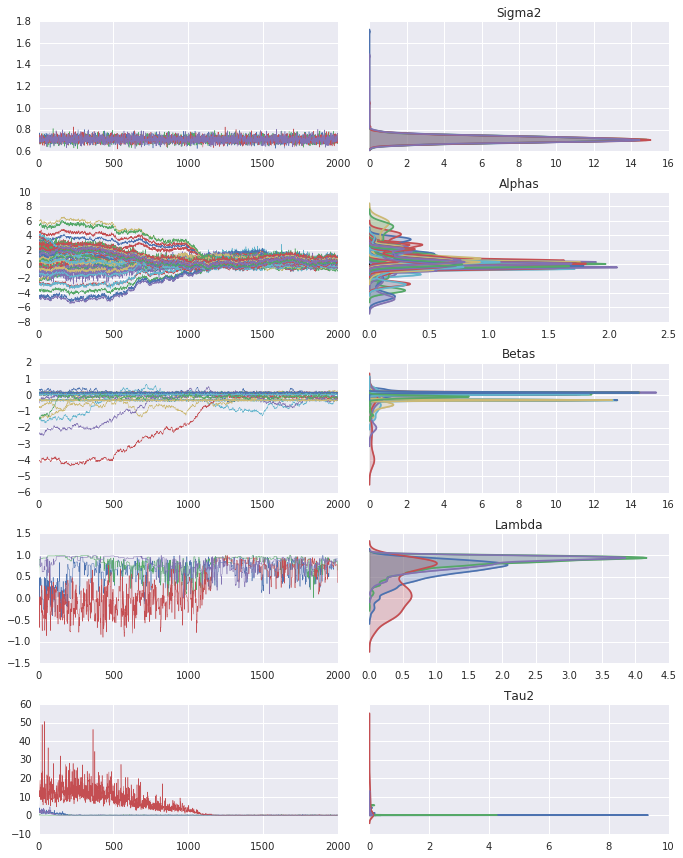

In [22]:
upper_se_cs.trace.plot()
plt.tight_layout()
plt.show()

In [23]:
upper_se_cs.sample(8000)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


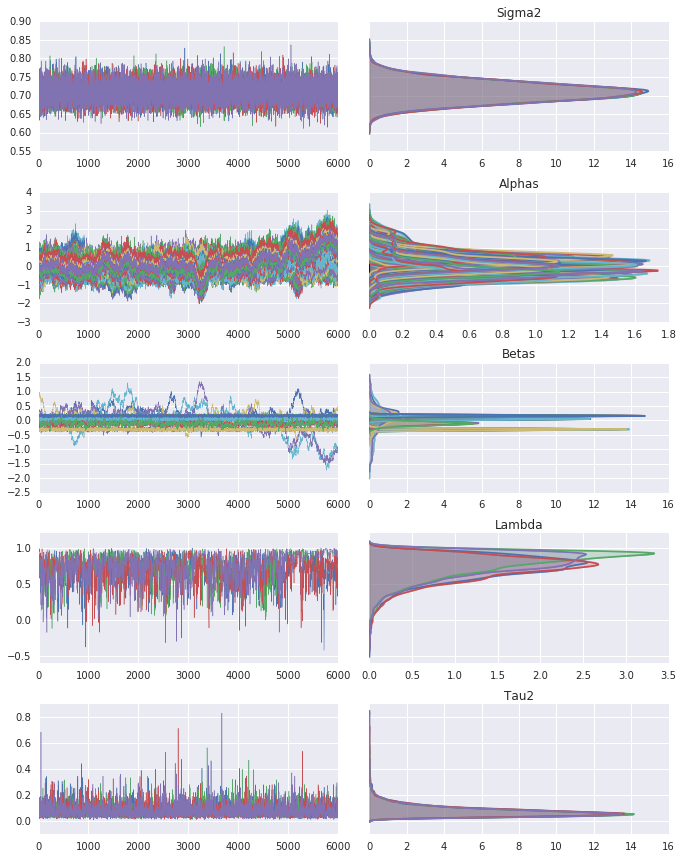

In [24]:
upper_se_cs.trace.plot(burn=4000)
plt.tight_layout()
plt.show()

In [3]:
configs = dict(tuning=500)
upper_se_cs = hlm.upper.SE(**upper, n_samples=5000, configs=configs, n_jobs=4, scale=True)
upper_se_c = hlm.upper.SE(**upper, n_samples=5000, configs=configs, n_jobs=4, scale=False)
upper_se_s = hlm.upper.SE(**upper, n_samples=5000, configs=configs, n_jobs=4, scale=True, center=False)
upper_se_none = hlm.upper.SE(**upper, n_samples=5000, configs=configs, n_jobs=4, scale=False, center=False)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


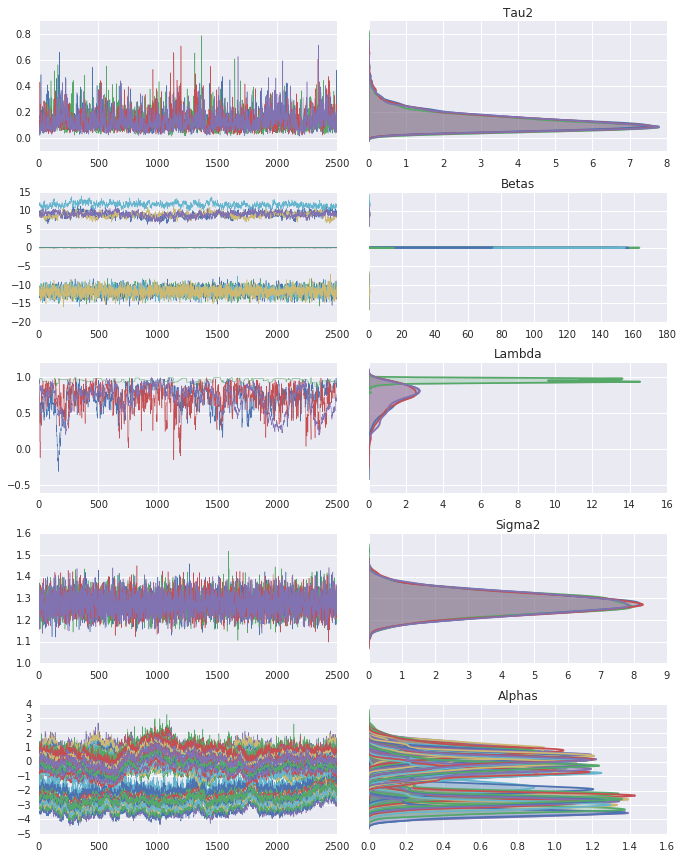

In [4]:
upper_se_none.trace.plot(burn=2500)
plt.tight_layout()
plt.show()

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


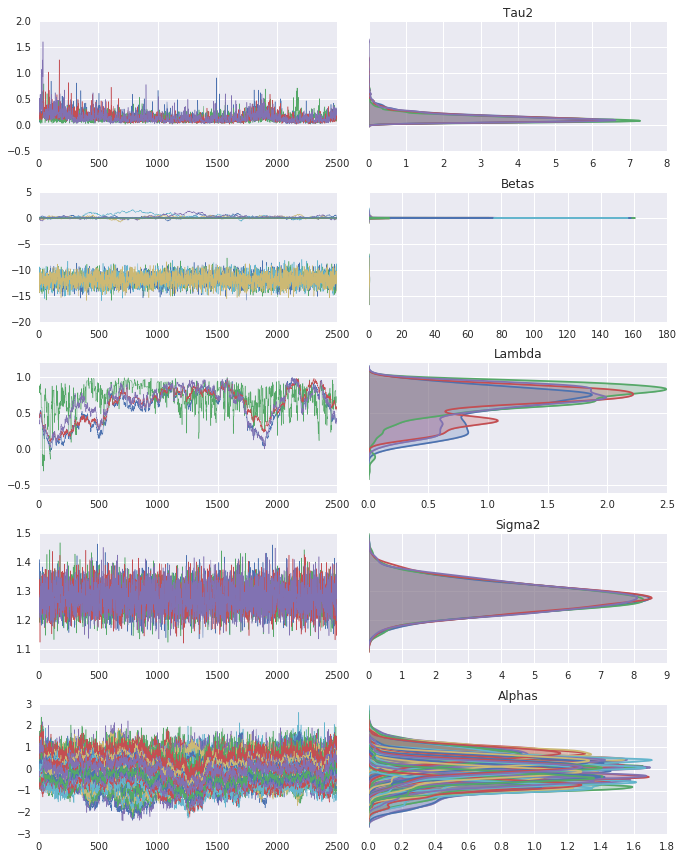

In [5]:
upper_se_c.trace.plot(burn=2500)
plt.tight_layout()
plt.show()

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


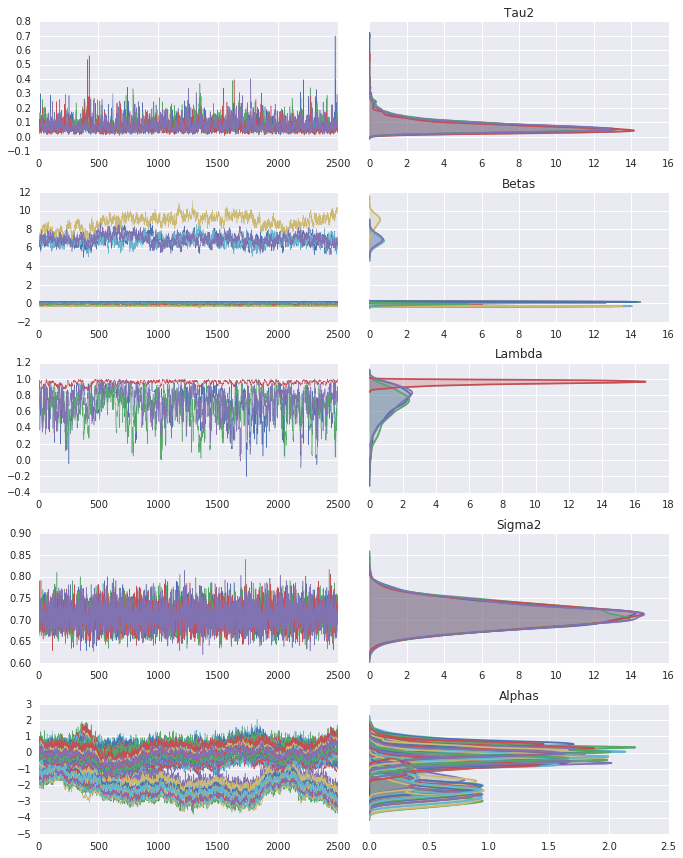

In [6]:
upper_se_s.trace.plot(burn=2500)
plt.tight_layout()
plt.show()

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


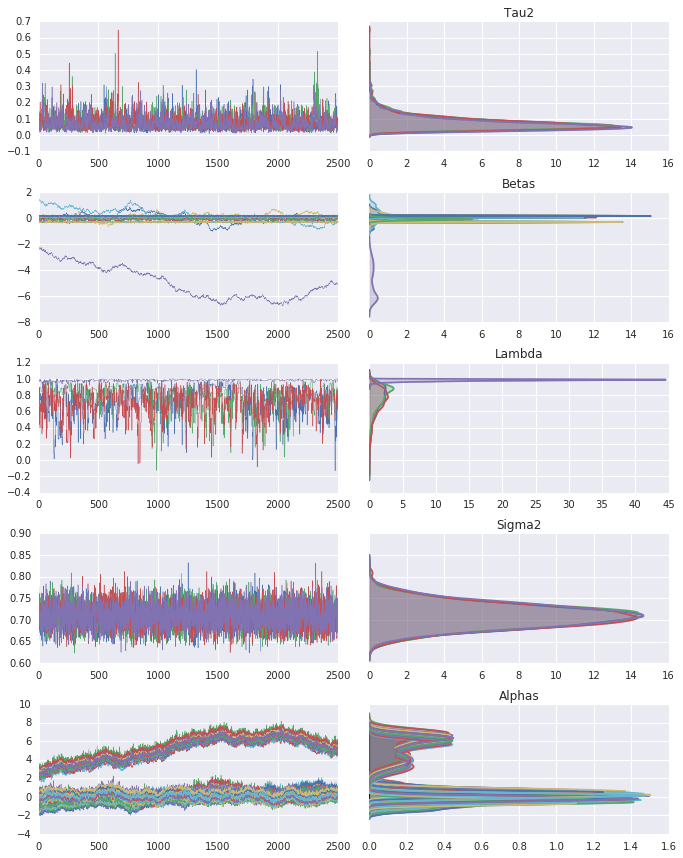

In [7]:
upper_se_cs.trace.plot(burn=2500)
plt.tight_layout()
plt.show()

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


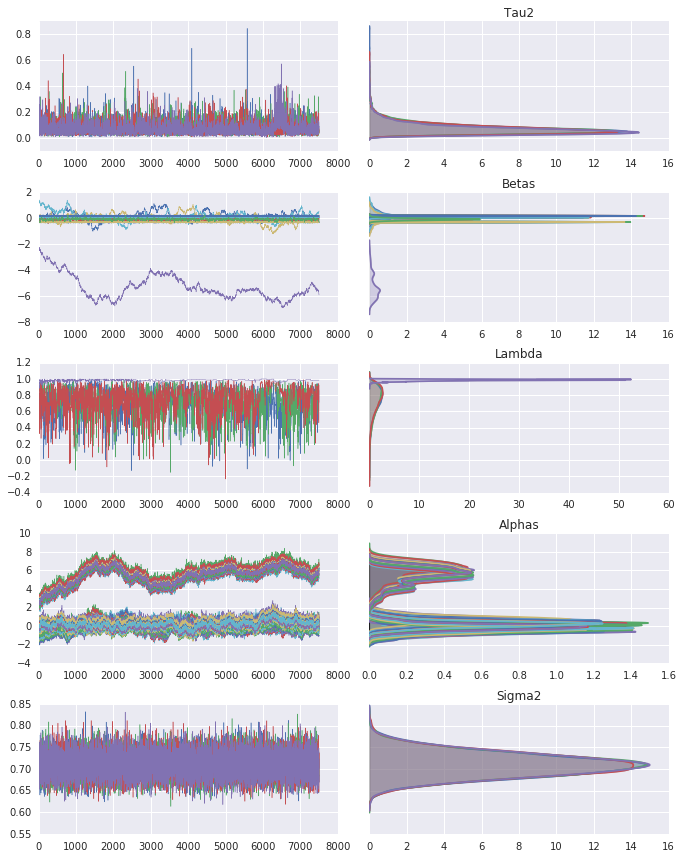

In [9]:
upper_se_cs.sample(5000)
upper_se_cs.trace.plot(burn=2500)
plt.tight_layout()
plt.show()

In [13]:
upper_se_cs.trace['Lambda'].mean(axis=1)

array([ 0.70734188,  0.67727836,  0.72243484,  0.95057319])